# Inter-Annotator Agreement Calculation: Krippendorff's Alpha

In [1]:
!pip install krippendorff

In [2]:
# importing libraries
import krippendorff
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
level_of_measurement = "nominal"

In [4]:
# loading IAA data for each question
data_combined_Q1 = '/Users/saraabesova/Documents/thesis/code/IAA/IAA_Q1_krippendorff_FINAL.xlsx'
data_combined_Q2 = '/Users/saraabesova/Documents/thesis/code/IAA/IAA_Q2_krippendorff_FINAL.xlsx'
data_combined_Q3 = '/Users/saraabesova/Documents/thesis/code/IAA/IAA_Q3_krippendorff_FINAL.xlsx'
data_combined_Q4 = '/Users/saraabesova/Documents/thesis/code/IAA/IAA_Q4_krippendorff_FINAL.xlsx'

In [5]:
# splitting each file into two groups: related and unrelated objects
# run just once to get the filtered files
import pandas as pd

def filter_groups(file_path):
    data = pd.read_excel(file_path) # load data
    related_obj = [col for col in data.columns if 'cup' in col] # list, define filtering of related group of objects (queries with cup and plate)
    unrelated_obj = [col for col in data.columns if 'apple' in col] # list, define filtering of unrelated group of objects (queries with apple and shoe)
    
    data_related = data[related_obj] # dataframe with related objects
    data_unrelated = data[unrelated_obj] # dataframe with unrelated objects
    
    root = os.path.splitext(file_path)[0] # removing the file type ending
    related_path = root + '_related.xlsx'
    unrelated_path = root + '_unrelated.xlsx'
    
    data_related.to_excel(related_path, index=False) # index=False to prevent row indexing
    data_unrelated.to_excel(unrelated_path, index=False)
    
    print('Both files were sucessfully saved.')


filter_groups(data_combined_Q1)
filter_groups(data_combined_Q2)
filter_groups(data_combined_Q3)
filter_groups(data_combined_Q4)

Both files were sucessfully saved.
Both files were sucessfully saved.
Both files were sucessfully saved.
Both files were sucessfully saved.


In [6]:
### path to the splitted files ###
# related objects
data_related_Q1 = '/Users/saraabesova/Documents/thesis/code/IAA/IAA_Q1_krippendorff_FINAL_related.xlsx'
data_related_Q2 = '/Users/saraabesova/Documents/thesis/code/IAA/IAA_Q2_krippendorff_FINAL_related.xlsx'
data_related_Q3 = '/Users/saraabesova/Documents/thesis/code/IAA/IAA_Q3_krippendorff_FINAL_related.xlsx'
data_related_Q4 = '/Users/saraabesova/Documents/thesis/code/IAA/IAA_Q4_krippendorff_FINAL_related.xlsx'

# unrelated objects
data_unrelated_Q1 = '/Users/saraabesova/Documents/thesis/code/IAA/IAA_Q1_krippendorff_FINAL_unrelated.xlsx'
data_unrelated_Q2 = '/Users/saraabesova/Documents/thesis/code/IAA/IAA_Q2_krippendorff_FINAL_unrelated.xlsx'
data_unrelated_Q3 = '/Users/saraabesova/Documents/thesis/code/IAA/IAA_Q3_krippendorff_FINAL_unrelated.xlsx'
data_unrelated_Q4 = '/Users/saraabesova/Documents/thesis/code/IAA/IAA_Q4_krippendorff_FINAL_unrelated.xlsx'

In [7]:
import pandas as pd
import numpy as np

def process_dataset(excel_path):
    load_data = pd.read_excel(excel_path) # loading the data (excel file)
    data = load_data.iloc[:, :901]  # selecting the first 901 columns
    data = data.iloc[:, 1:]  # getting rid of the first column

    mapping = {'No': 0, 'Yes': 1}  # mapping - 'No' to value 0 and 'Yes' to value 1
    data = data.replace(mapping)

    data_array = data.to_numpy() # create a NumPy array and populate it with data

    return data_array

In [8]:
# calculation of Inter-Annotator Agreement level using Krippendorff's alpha
def calculate_alpha(datasets):
    alpha_results = {} # store it as i will need it later for visualisations
    for key, data in datasets.items():
        resulting_array = process_dataset(data)
        alpha = krippendorff.alpha(reliability_data=resulting_array, level_of_measurement="nominal")
        print(f"Krippendorff's Alpha - {key}: {alpha} \n")
        alpha_results[key] = alpha # stores alpha value for every dataframe
    return alpha_results

In [9]:
datasets_combined = {
    'Q1': data_combined_Q1,
    'Q2': data_combined_Q2,
    'Q3': data_combined_Q3,
    'Q4': data_combined_Q4
}

print("IAA score for each question for both groups of objects (combined):")
print("--------------------------------------------")
alpha_values = calculate_alpha(datasets_combined)

IAA score for each question for both groups of objects (combined):
--------------------------------------------
Krippendorff's Alpha - Q1: 0.7468270866186327 

Krippendorff's Alpha - Q2: 0.8588148540630658 

Krippendorff's Alpha - Q3: 0.4782007141464202 

Krippendorff's Alpha - Q4: 0.8708749403418327 



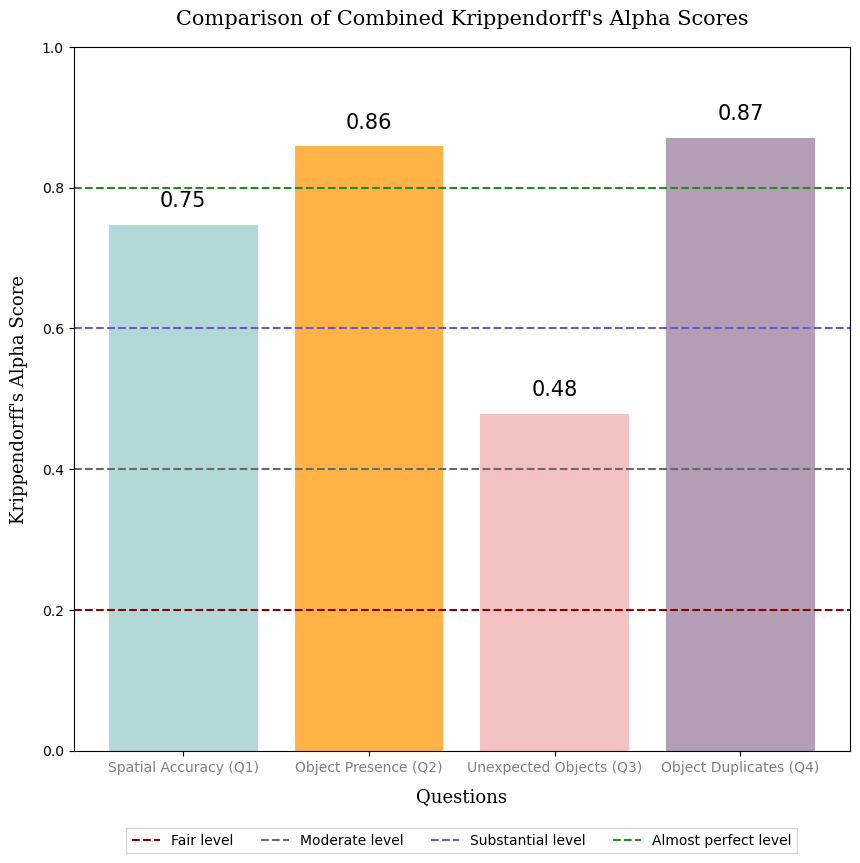

In [10]:
import matplotlib.pyplot as plt

# plotting
questions = ['Spatial Accuracy (Q1)', 'Object Presence (Q2)', 'Unexpected Objects (Q3)', 'Object Duplicates (Q4)'] # list of questions
scores = list(alpha_values.values())

# initialising the bar chart
plt.figure(figsize=(8.7, 8.7))
colors = ['#b2d8d8', '#ffb347', '#f4c2c2', '#b39eb5']  # colors: pastel blue, pastel orange, pastel pink, pastel purple
bars = plt.bar(questions, scores, color=colors)
plt.xlabel('Questions', font='serif', labelpad=10, fontsize=13) # label settings
plt.ylabel('Krippendorff\'s Alpha Score', labelpad=10, font='serif', fontsize=13, color='black')

plt.xticks(color='grey')

plt.title('Comparison of Combined Krippendorff\'s Alpha Scores', font='serif', fontsize=15, color='black', pad=16)
plt.ylim(0, 1)  # alpha value range: 0-1

plt.axhline(y=0.2, color='darkred', linestyle='--', label='Fair level')
plt.axhline(y=0.4, color='dimgrey', linestyle='--', label='Moderate level')
plt.axhline(y=0.6, color='slateblue', linestyle='--', label='Substantial level')
plt.axhline(y=0.8, color='forestgreen', linestyle='--', label='Almost perfect level')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=False, shadow=False, ncol=4)

# adding scores on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom', color='black', fontsize=15)


plt.tight_layout()
plt.savefig('/Users/saraabesova/Documents/krippendorff_combined.png', format='png', dpi=300)

plt.show()

In [11]:
datasets_related_objects = {
    'related objects - Q1': data_related_Q1,
    'related objects - Q2': data_related_Q2,
    'related objects - Q3': data_related_Q3,
    'related objects - Q4': data_related_Q4
}

print("IAA score for each question for related group of objects:")
print("---------------------------------------------------------")
alpha_values_related = calculate_alpha(datasets_related_objects)

IAA score for each question for related group of objects:
---------------------------------------------------------
Krippendorff's Alpha - related objects - Q1: 0.7537907950704649 

Krippendorff's Alpha - related objects - Q2: 0.5433770239013107 

Krippendorff's Alpha - related objects - Q3: 0.29802638306575313 

Krippendorff's Alpha - related objects - Q4: 0.823479401257179 



In [12]:
datasets_unrelated_objects = {
    'unrelated objects - Q1': data_unrelated_Q1,
    'unrelated objects - Q2': data_unrelated_Q2,
    'unrelated objects - Q3': data_unrelated_Q3,
    'unrelated objects - Q4': data_unrelated_Q4
}

print("IAA score for each question for unrelated group of objects:")
print("---------------------------------------------------------")
alpha_values_unrelated = calculate_alpha(datasets_unrelated_objects)

IAA score for each question for unrelated group of objects:
---------------------------------------------------------
Krippendorff's Alpha - unrelated objects - Q1: 0.7247076608421146 

Krippendorff's Alpha - unrelated objects - Q2: 0.945134875631805 

Krippendorff's Alpha - unrelated objects - Q3: 0.5583038506896375 

Krippendorff's Alpha - unrelated objects - Q4: 0.919655221813667 



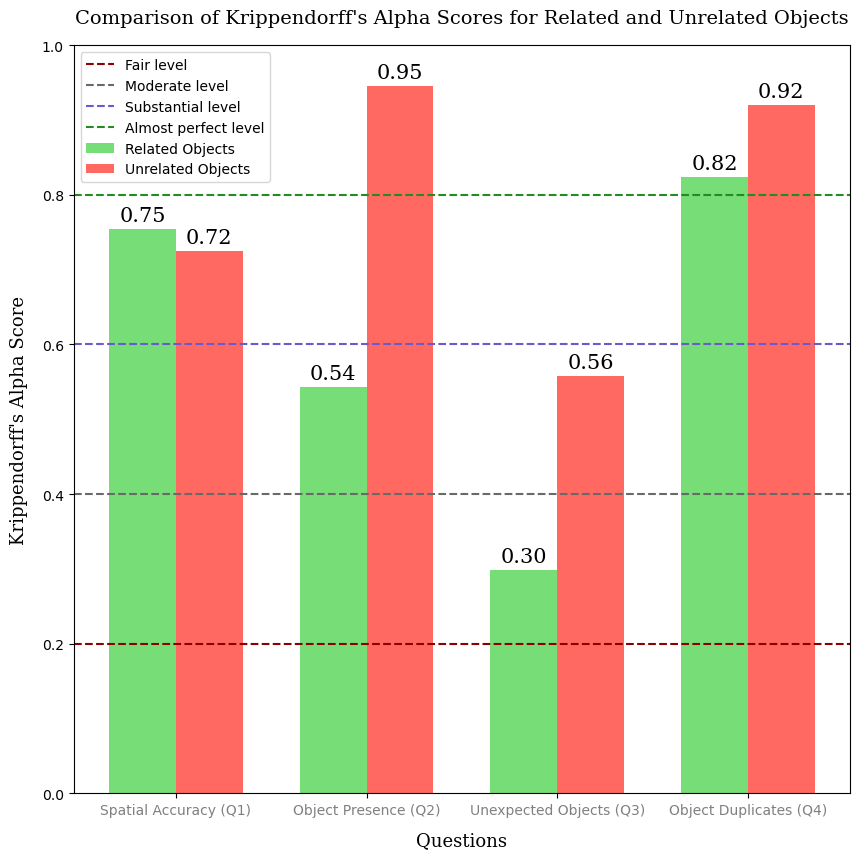

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# loading data
scores_related = list(alpha_values_related.values())  # data for related objects
scores_unrelated = list(alpha_values_unrelated.values())  # data for unrelated objects
questions = ['Spatial Accuracy (Q1)', 'Object Presence (Q2)', 'Unexpected Objects (Q3)', 'Object Duplicates (Q4)']

x = np.arange(len(questions))

# width of the bars
width = 0.35

fig, ax = plt.subplots(figsize=(8.7, 8.7))
rects1 = ax.bar(x - width/2, scores_related, width, label='Related Objects', color='#77dd77')
rects2 = ax.bar(x + width/2, scores_unrelated, width, label='Unrelated Objects', color='#ff6961')

# label setting
ax.set_xlabel('Questions', labelpad=10, font='serif', fontsize=13, color='black')
ax.set_ylabel('Krippendorff\'s Alpha Score')

plt.ylabel('Krippendorff\'s Alpha Score', labelpad=10, font='serif', fontsize=13, color='black')

plt.xticks(color='grey') 

ax.set_title('Comparison of Krippendorff\'s Alpha Scores for Related and Unrelated Objects', font='serif', fontsize=14, pad=16)
ax.set_xticks(x)
ax.set_xticklabels(questions)
ax.set_ylim(0, 1) 

ax.axhline(y=0.2, color='darkred', linestyle='--', label='Fair level')
ax.axhline(y=0.4, color='dimgrey', linestyle='--', label='Moderate level')
ax.axhline(y=0.6, color='slateblue', linestyle='--', label='Substantial level')
ax.axhline(y=0.8, color='forestgreen', linestyle='--', label='Almost perfect level')
ax.legend()

def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', font='serif', fontsize=15)

# add labels to bars
add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.savefig('/Users/saraabesova/Documents/krippendorff_related_vs_unrelated.png', format='png', dpi=300)
plt.show()


